#1. Predator-Prey model

Let's consider the following system of Predator-Prey model given by: 

\begin{align*}
  \dfrac{dx}{dt} &= x(1 - \dfrac{y}{\mu_2}),\,  \ \ \ \ \ x(0)=\eta_1 \\
  \dfrac{dy}{dt} &= -y(1 - \dfrac{x}{\mu_1}),\,  \ \ \ y(0)=\eta_2
\end{align*}

where: $η_1 =400,\, \ \eta_2=100, \, \ \mu_1=300, \ \ \mu_2=200$ 


Let's, just recall that, the Predator-Prey is the dynamics model of the predator population and a prey population. 

We are going to suppose in our case that: 

*   $x$ represent the population of prey
*   $y$ represent the population of predator


*   $\mu_1,\, \mu_2,\, \eta_1,\, \eta_2$ are the parameter that determine the growth rate and the intereaction between the population. 






## a. Let's write the code of Explicit Euler method to compute the approximation solution of the system on the interval $[0,\, 50]$

Before write the code, let's us recall some backgroung about the Explicit Euler method. 
In fact, the Euler consist of the discreatisation, that means approximation of the solution $(x(t),\, y(t))$ on aonly a discret subset $\{t_n,\, n=0,\, 1,\, ⋯,\, N\}$ of interval  $[0,\, 50].$

Where the numbers of sub-inyerval is given by: $h = \dfrac{50 - 0}{N}$ with $h$ as the time-step. 

The Explicit Euler method is: 

\begin{align*}
  y_0 &= \text{given value} \\
  y_{n+1} &= y_n + h\,f(t_n,\, y_n)
\end{align*}


In [51]:
## Now let's start with our code

# importation of important library
import numpy as np
import matplotlib.pyplot as plt

# Let's fixed the Parameters
mu1 = 300
mu2 = 200

# Initial conditions
x0 = 400
y0 = 100

# define the time step and number of time steps
N = 5000 
h = 0.01

# let's create the arrays who going to store the solution
x = np.zeros(N)
y = np.zeros(N)

# Here, we set the initial values of arrays solution by the initial condition
x[0] = x0
y[0] = y0


# We can now start write the Explicit Euler 
# because we know the initials values, we start compute at the time t = 1
for i in range(1, N):
    x[i] = x[i-1] + h*(x[i-1] * (1-(y[i-1]/mu2)))
    y[i] = y[i-1] + h*(-y[i-1] * (1-(x[i-1]/mu1)))

In [52]:
#let's print the five first approximation of solution of the prey population
print(x[:10])

[400.         402.         404.0033     406.00969216 408.01896343
 410.03089546 412.04526452 414.06184144 416.08039152 418.10067446]


In [53]:
#let's print the five first approximation of solution of the predator population
print(y[:10])

[100.         100.33333333 100.67446667 101.02348256 101.38046483
 101.74549859 102.1186702  102.50006732 102.88977886 103.28789506]


##b. Let plot the graphs of $x(t)$ and $y(t)$

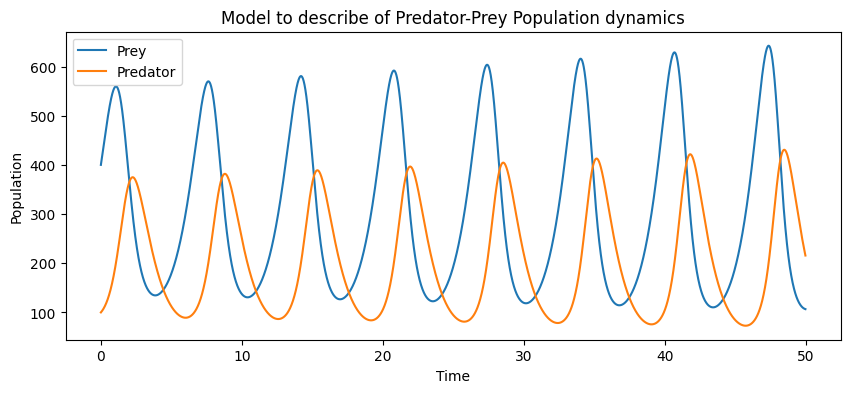

In [54]:
# Initialisation of time values
# remember the solution in taking into the interval [0, 50] 
# and we subdivised the interval in 4999 sub intervals, then we have 5000 points. 
# remenber, above we define our N=5000 ie h=0.01 and 50 = N*h
# so now let generate our different time into [0, 50] that we are going to use to plot

t = np.arange(0, N*h, h)  # to generate 5000 point into the interval [0,50]

# Plotting of graph of the solutions
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Prey')
plt.plot(t, y, label='Predator')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Model to describe of Predator-Prey Population dynamics')
plt.show()

##b. Here, we have to plot the phase diagram of the system

Before give the code to plot the phase diagram, let's recall the definition of phase diagram of the system. 

The phase diagram can easily define as the representation of the solutions here $(x(t),\, y(t))$ of a system in a state space.

So here, instead of plotting the dynamics of the solution over the time, we plot the system in a state space where each axis represents a population. 

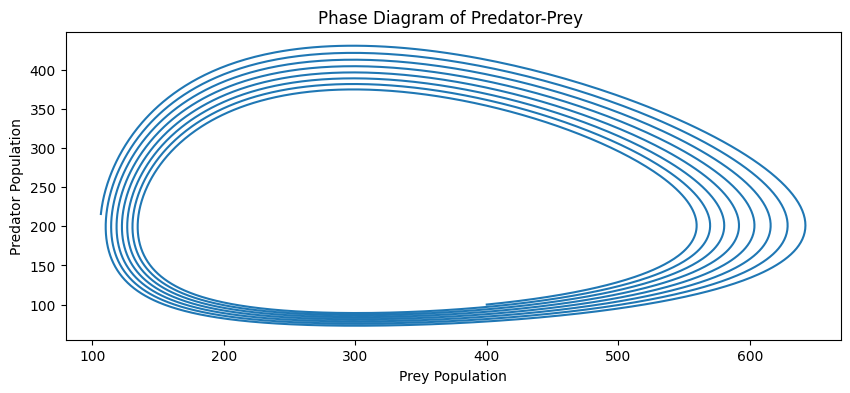

In [55]:
# Code for plotting phase diagram
plt.figure(figsize=(10, 4))
plt.plot(x, y)
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Diagram of Predator-Prey ')
plt.show()

# 3. Runge-Kutta methods of order 2

Our goal in this question is to approximate the same model as before, the Predator-prey model, but now using the Runge-Kutta methods. 

Before given the code, let's recall the Runge-Kutta method. 

Given the system:
\begin{align*}
  y(0) &= α\ \ \text{a given value}\\
  y^{\prime} (t) &= f(t, y(t))
\end{align*}

The Runge-Kutta method of order 2 is given by: 

\begin{align*}
  y_0 &= α\ \ \text{a given value}\\
  y_{n+1} &= y_n + h\, f(t_n+\dfrac{h}{2},\  y_n + \dfrac{h}{2}\, f(t_n,\, y_n)) 
\end{align*}






Here, all the initial condition and the system as in the question 1 remain the same. 

Our task here is just write the code to compute the Runge-Kutta of order 2. 

The difficulty here is to calculate $f(t_n+\dfrac{h}{2},\  y_n + \dfrac{h}{2}\, f(t_n,\, y_n)) $

To do that, we first of all have to compute for each time the value of $\dfrac{h}{2}\, f(t_n,\, y_n)) $ (denote in our code by the variable "partial"). After, that we just have to compute the value $h\,f(t_n+\dfrac{h}{2},\  y_n + \dfrac{h}{2}\, f(t_n,\, y_n)) $ (named in our code by the variable "final")


Let's write our different function: 



In [56]:
for i in range(1, N):
    partial_x = h/2 * (x[i-1] * (1 - (y[i-1]/mu2) ))

    partial_y = h/2 * (-y[i-1] * (1 - (x[i-1]/mu1) ))

    final_x =   h * ( (x[i-1] + partial_x/2) * (1 - (y[i-1] + partial_y)/mu2) ) 

    final_y =   h * ( -(y[i-1] + partial_y/2) * (1 - (x[i-1] + partial_x)/mu1) )

    x[i] = x[i-1] + final_x

    y[i] = y[i-1] + final_y


In [57]:
#let's print the five first approximation of solution of the prey population
print(x[:10])

[400.         401.9991625  404.00144853 406.00664578 408.01453665
 410.0248982  412.03750205 414.0521143  416.06849547 418.08640043]


In [58]:
#let's print the five first approximation of solution of the prey population
print(y[:10])

[100.         100.33694722 100.68173281 101.03443962 101.39515175
 101.76395456 102.14093465 102.52617991 102.91977947 103.32182371]


##b. Let plot the graphs of $x(t)$ and $y(t)$ get using the Runge-Kutta order 2

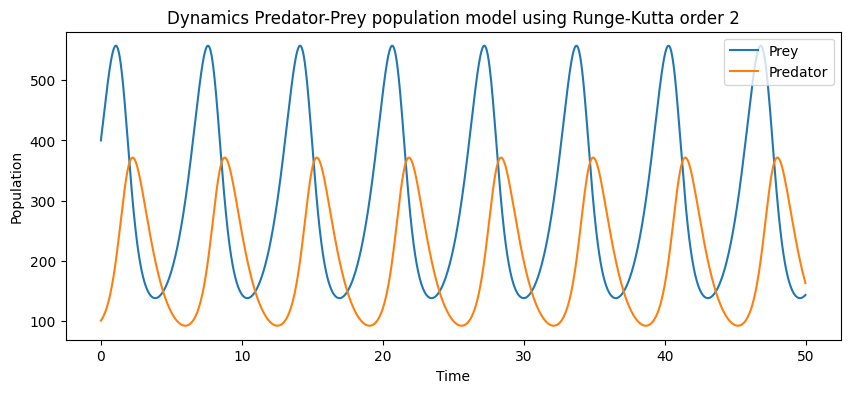

In [59]:
# initialisation of time-steps
t = np.arange(0, N*h, h)

# Plotting of graph 
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='Prey')
plt.plot(t, y, label='Predator')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Dynamics Predator-Prey population model using Runge-Kutta order 2')
plt.show()

##c. The phase diagram

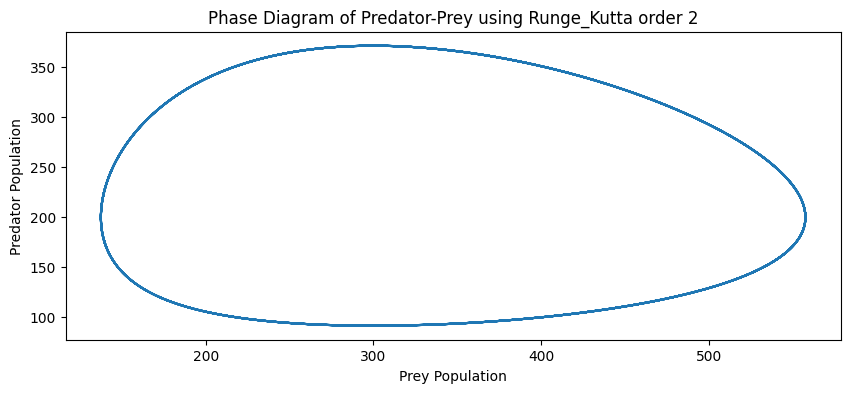

In [60]:
# Code for plotting phase diagram of Rung-Kutta order 2
plt.figure(figsize=(10, 4))
plt.plot(x, y)
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Diagram of Predator-Prey using Runge_Kutta order 2')
plt.show()